In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<Axes: title={'center': 'l bilinear'}>,
 Text(0.5, 1.0, 'l bilinear'))

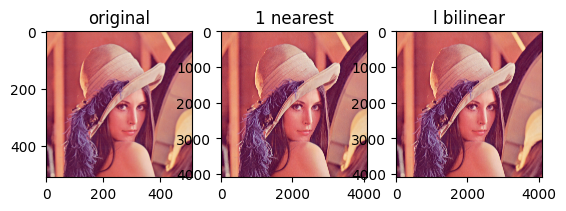

In [2]:
 img = cv2.imread('Lena.png')

width = int(img.shape[1]*8 )
height = int(img.shape[0]*8)
dim = (width, height)  # Note:  width-height so shape[1] and shape[0]. ^^;;
img_large_nearest = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST) 
img_large_bilinear = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR) 
plt.subplot(1,3,1),plt.imshow(img[:,:,::-1]),plt.title('original')
plt.subplot(1,3,2),plt.imshow(img_large_nearest[:,:,::-1]),plt.title('1 nearest')
plt.subplot(1,3,3),plt.imshow(img_large_bilinear[:,:,::-1]),plt.title('l bilinear')

(<Axes: title={'center': 's cubic'}>,
 Text(0.5, 1.0, 's cubic'))

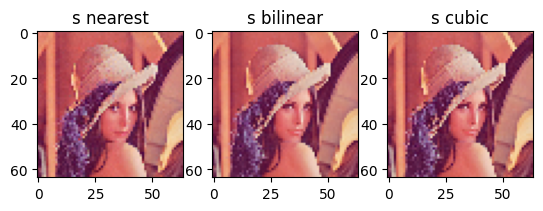

In [5]:
width = int(img.shape[1]//8 )
height = int(img.shape[0]//8)
dim = (width, height)  # Note:  width-height so shape[1] and shape[0]. ^^;;
img_small_nearest = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST) 
img_small_bilinear = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR) 
img_small_cubic = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC) 
  
plt.subplot(1,3,1),plt.imshow(img_small_nearest[:,:,::-1]),plt.title('s nearest')
plt.subplot(1,3,2),plt.imshow(img_small_bilinear[:,:,::-1]),plt.title('s bilinear')
plt.subplot(1,3,3),plt.imshow(img_small_cubic[:,:,::-1]),plt.title('s cubic')

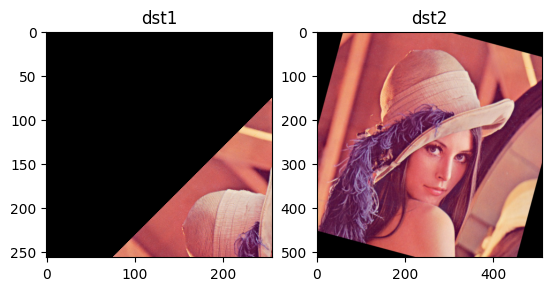

In [7]:
# by defining matrix 
src = cv2.imread('Lena.png')


rows, cols, channels = src.shape
M1 = cv2.getRotationMatrix2D( (rows/2, cols/2),  45, 0.5 )  # center, rotation, scale 
M2 = cv2.getRotationMatrix2D( (rows/2, cols/2), -15, 1.0 )  # center, rotation, scale 

dst1 = cv2.warpAffine( src, M1, (rows//2, cols//2))
dst2 = cv2.warpAffine( src, M2, (rows, cols))

plt.subplot(1,2,1)
plt.imshow(dst1[:,:,::-1]), plt.title('dst1')
plt.subplot(1,2,2)
plt.imshow(dst2[:,:,::-1]), plt.title('dst2')

plt.show()

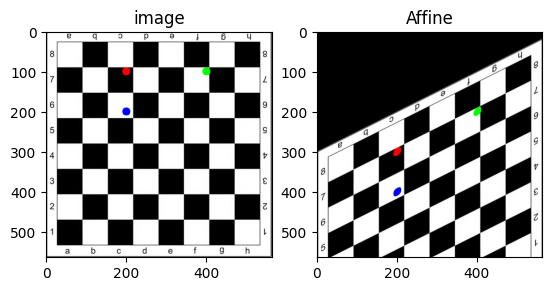

In [8]:
img = cv2.imread('chessboard.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

[[-1.50420572e+00 -1.21193145e+00  1.71965717e+03]
 [-1.00869881e-02 -3.30429892e+00  3.06526591e+03]
 [ 3.56952975e-05 -2.28129528e-03  1.00000000e+00]]


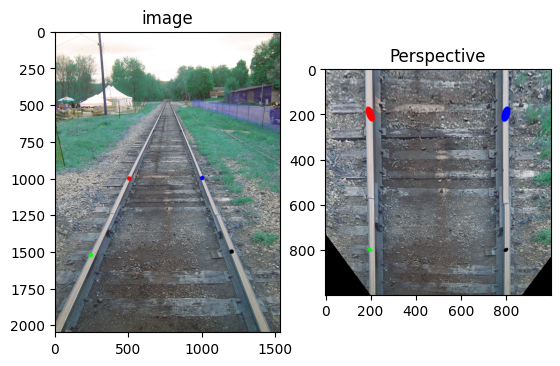

In [9]:
img = cv2.imread('perspective.jpg')
# [x,y] 좌표점을 4x2의 행렬로 작성

# 1. 이동 점 
# 좌표의 이동전의 점:  좌상->좌하->우상->우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1200,1500]])
# 좌표의 이동후의 점
pts2 = np.float32([[200,200],[200,800],[800,200],[800,800]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 15, (255,0,0),-1)
cv2.circle(img, (243,1524), 15, (0,255,0),-1)
cv2.circle(img, (1000,1000), 15, (0,0,255),-1)
cv2.circle(img, (1200,1500), 15, (0,0,0),-1)

cv2.imwrite("p1.png", img) # save 

# 2. 메트릭스 계산 
M = cv2.getPerspectiveTransform(pts1, pts2)  # matrix 계산 
print(M)

dst = cv2.warpPerspective(img, M, (1000,1000))
cv2.imwrite("p2.png", dst) # save 


plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()